## Data Visualization and Preprocessing

In this notebook, the [Heart Disease Prediction Dataset](https://www.kaggle.com/datasets/krishujeniya/heart-diseae?resource=download) will be explored before using it to train a machine learning model.

### Importing the modules to explore the dataset

In [1]:
import pandas as pd                     # for data transformation
import matplotlib.pyplot as plt         # for data plotting
import seaborn as sns                   # for visualization

### Loading the Data

In [2]:
HEART_DISEASE_PATH = 'data/heart-disease.csv'
disease_data = pd.read_csv(HEART_DISEASE_PATH) # imports the downloaded Kaggle dataset

disease_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


From above, we see that the dataset has 14 columns:

- `age` (in years)
- `sex` (1 = male, 0 = female)
- `cp`: chest pain type (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic)
- `trestbps`: resting blood pressure (in mm Hg)
- `chol`: serum cholesterol in mg/dl
- `fbs`: fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
- `restecg`: resting electrocardiographic results (0 = normal, 1 = having ST-T wave abnormality, 2 = showing)
- `thalach`: maximum heart rate achieved
- `exang`: exercise induced angina (1 = yes, 0 = no)
- `oldpeak`: ST depression induced by exercise relative to rest
- `slope`, `ca`, `thal`, `target`: not described

In [3]:
disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


As there are only 303 entries, we are experimenting with a very small dataset. However, this dataset is a good starting point for a beginner like me to explore.

Another good thing to note is that all columns have a non-null count of 303, meaning that there are no missing values in the dataset.

In [4]:
disease_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


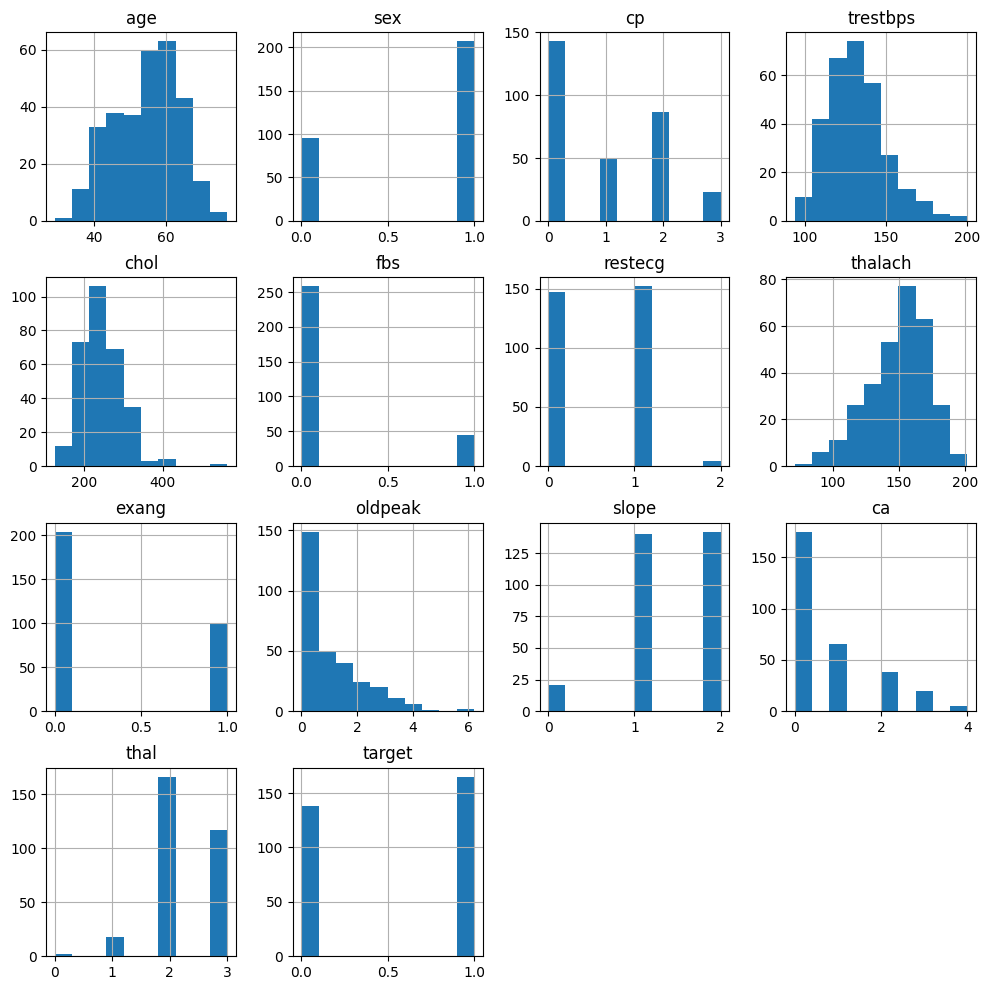

In [5]:
disease_data.hist(figsize=(12,12))
plt.show()

From the descriptive statistics and the histograms, we can see that the dataset is male-dominated and mostly taken from people who are in their 50s and 60s. Most chest pain described in the dataset is also classified as typical angina.

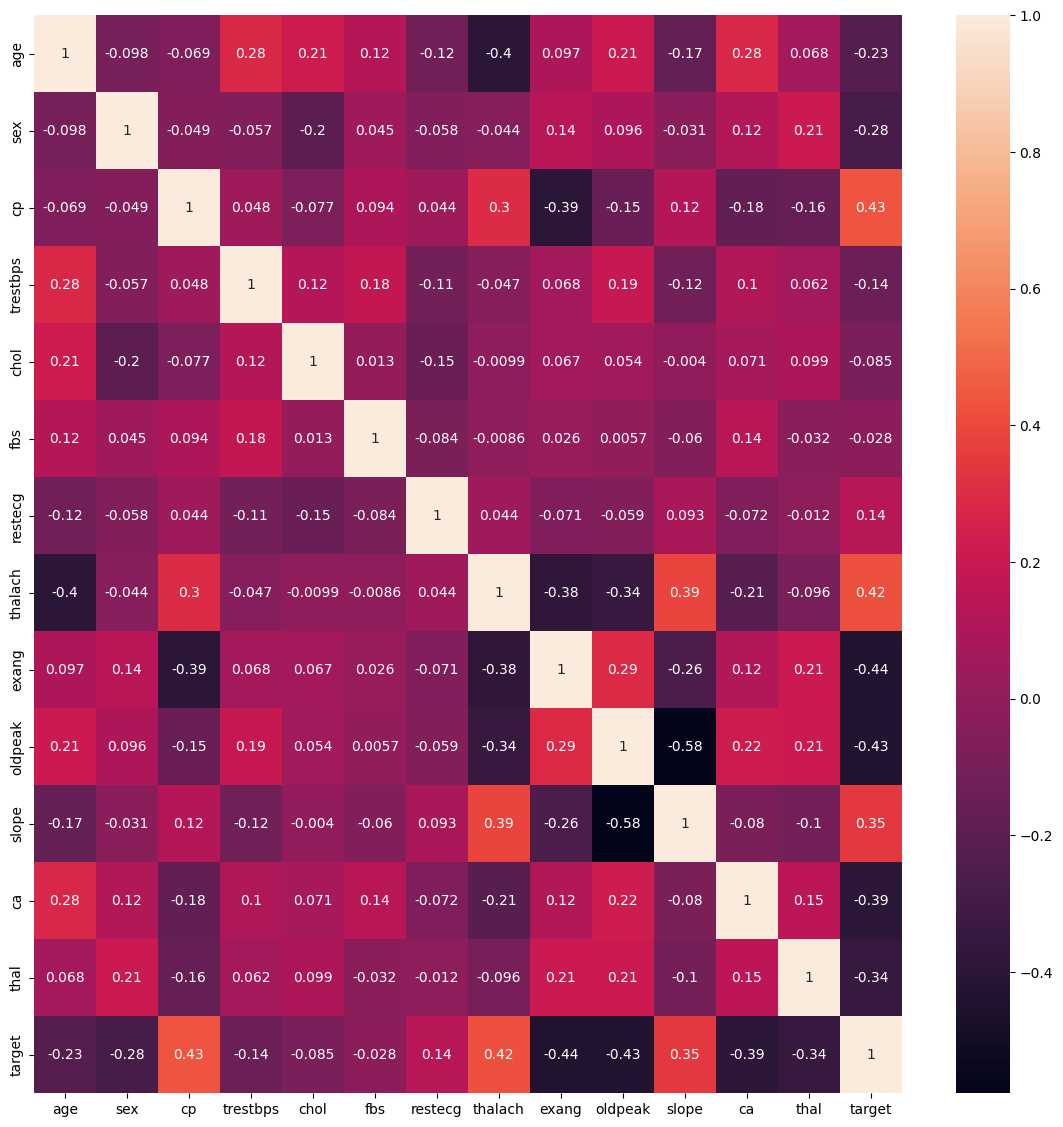

In [6]:
plt.figure(figsize=(14,14))
sns.heatmap(disease_data.corr(), annot=True)
plt.show()

From the correlation matrix, we see no clear indication of a dataset feature that has a good relationship with another variable. The most notable relationship is the -0.58 correlation between `oldpeak` and `slope`.